# Data Tidying

Real data can be messy and as we know low quality data leads to low quality results. Making the data more organized, and readable is the result of applying data tidying. We want to structure our data in a way that makes it easy to analyze and use.

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.

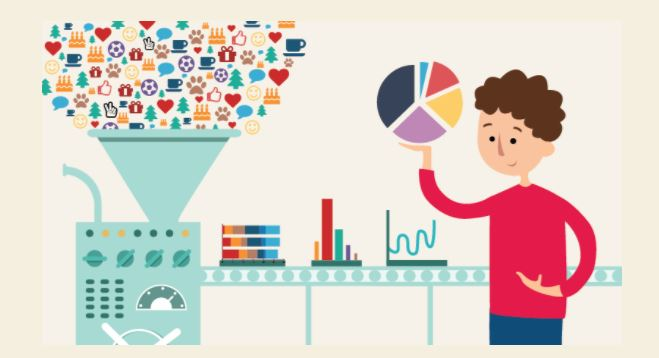



When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. The measurement units are consistent wihtin a column.
4. Cells contain atomic values. (No multiple valuer per table cell)

We can then say that our dataset is *tidy*.

In this section two main `pandas` functions are used in data tidying those are `melt` and `pivot_table`.

In [ ]:
import pandas as pd

### **PEW Research Dataset**

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

1. Start by Importing the dataset into a pandas dataframe.

In [ ]:
df_pew_research =  pd.read_csv('PEW.csv')

2. Observe the dataset using the `loc`, `iloc`, `head`, or `tail` approaches

In [ ]:
df_pew_research.iloc[0:]

,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35
5,Evangelical Prot,575,869,1064,982,881,1486
6,Hindu,1,9,7,9,11,34
7,Historically Black Prot,228,244,236,238,197,223
8,Jehovahs Witness,20,27,24,24,21,30
9,Jewish,19,19,25,25,30,95


***What does not seem right in the above dataframe?***

3. Try to make the column headers represent a variable not a value. For that, use the `melt` function. The `melt` function converts a DataFrame from wide format to long format. The arguments are as follows:


1.  `id_vars`: column(s) to use as identifier variable(s)
2.   `values`: columns(s) to unpivot. If unspecified, uses all columns that are not in `id_vars`.
3. `var_name`: name to use for the varible columns
4. `value_name`: name to use for the value column.



In [ ]:
pd.melt(df_pew_research,id_vars=["religion"],var_name="income range", value_name="citizens count")

,religion,income range,citizens count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15
5,Evangelical Prot,<$10k,575
6,Hindu,<$10k,1
7,Historically Black Prot,<$10k,228
8,Jehovahs Witness,<$10k,20
9,Jewish,<$10k,19


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list.

1. Read the dataset and store it in a pandas dataframe. Note that the usual utf-8 encoding does not work on this dataset. The reason behind this is that there might be characters that are not supported by `utf-8`. The suggestion is to use for this dataset `unicode_escape` encoding.

In [ ]:
df_billboard = pd.read_csv('Billboard.csv',encoding="unicode_escape")

2. Observe the first few rows of the dataset.

In [ ]:
df_billboard.head(30)

,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,x4th.week,x5th.week,x6th.week,x7th.week,x8th.week,x9th.week,x10th.week,x11th.week,x12th.week,x13th.week,x14th.week,x15th.week,x16th.week,x17th.week,x18th.week,x19th.week,x20th.week,x21st.week,x22nd.week,x23rd.week,x24th.week,x25th.week,x26th.week,x27th.week,x28th.week,x29th.week,x30th.week,x31st.week,x32nd.week,x33rd.week,...,x37th.week,x38th.week,x39th.week,x40th.week,x41st.week,x42nd.week,x43rd.week,x44th.week,x45th.week,x46th.week,x47th.week,x48th.week,x49th.week,x50th.week,x51st.week,x52nd.week,x53rd.week,x54th.week,x55th.week,x56th.week,x57th.week,x58th.week,x59th.week,x60th.week,x61st.week,x62nd.week,x63rd.week,x64th.week,x65th.week,x66th.week,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,33.0,23.0,15.0,7.0,5.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,3.0,7.0,10.0,12.0,15.0,22.0,29.0,31.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,5.0,2.0,3.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,8.0,15.0,19.0,21.0,26.0,36.0,48.0,47.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,31.0,20.0,13.0,7.0,6.0,4.0,4.0,4.0,6.0,4.0,2.0,1.0,1.0,1.0,2.0,1.0,2.0,4.0,8.0,8.0,12.0,14.0,17.0,21.0,24.0,30.0,34.0,37.0,46.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,14.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0,4.0,8.0,11.0,16.0,20.0,25.0,27.0,27.0,29.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,29.0,23.0,18.0,11.0,9.0,9.0,11.0,1.0,1.0,1.0,1.0,4.0,8.0,12.0,22.0,23.0,43.0,44.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2000,Janet,Doesn't Really Matter,4:17,Rock,2000-06-17,2000-08-26,59,52.0,43.0,30.0,29.0,22.0,15.0,10.0,10.0,5.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0,7.0,8.0,20.0,25.0,37.0,40.0,41.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2000,Destiny's Child,Say My Name,4:31,Rock,1999-12-25,2000-03-18,83,83.0,44.0,38.0,16.0,13.0,16.0,16.0,16.0,18.0,17.0,14.0,1.0,1.0,1.0,2.0,2.0,3.0,5.0,5.0,5.0,7.0,10.0,13.0,14.0,18.0,23.0,23.0,34.0,37.0,43.0,47.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2000,"Iglesias, Enrique",Be With You,3:36,Latin,2000-04-01,2000-06-24,63,45.0,34.0,23.0,17.0,12.0,9.0,8.0,8.0,6.0,5.0,4.0,1.0,1.0,1.0,3.0,11.0,14.0,24.0,28.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2000,Sisqo,Incomplete,3:52,Rock,2000-06-24,2000-08-12,77,66.0,61.0,61.0,61.0,55.0,2.0,1.0,1.0,2.0,2.0,4.0

***What is wrong with the above dataset?***

3. Let's, again, use the `melt` function to fix the general structure of the dataframe.

In [ ]:
#Which columns do I want to keep, as they are? 
id_vars=['year',	'artist.inverted',	'track',	'time',	'genre',	'date.entered',	'date.peaked']
df_billboard = pd.melt(df_billboard,id_vars=id_vars,var_name='Week', value_name='Rank')

In [ ]:
df_billboard

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,Rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,x1st.week,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,x1st.week,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,x1st.week,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,x1st.week,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,x1st.week,57.0
...,...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,2000-08-05,x76th.week,NaN
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,2000-02-12,x76th.week,NaN
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,2000-09-02,x76th.week,NaN
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,2000-07-01,x76th.week,NaN


# Regular Expressions

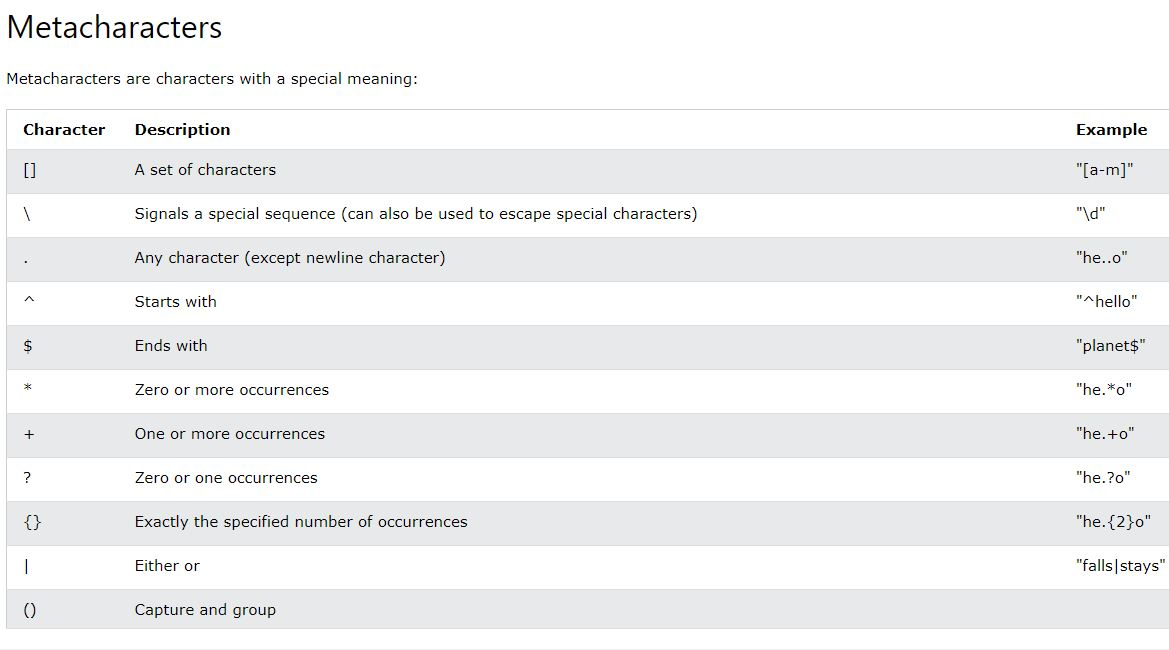

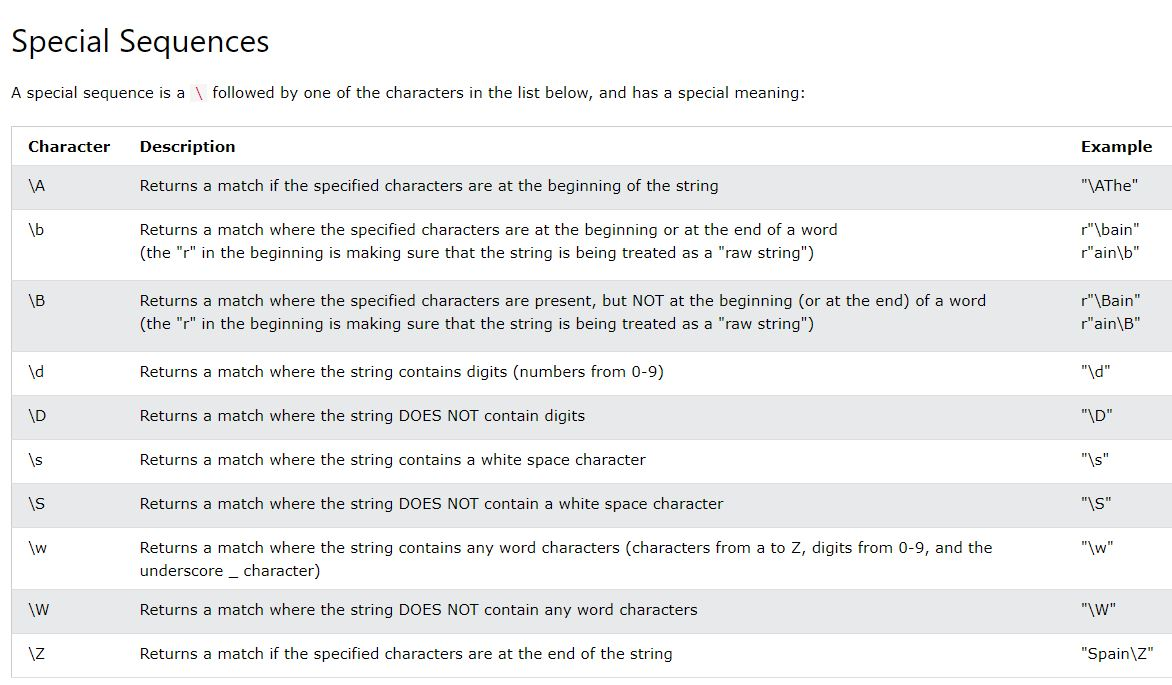

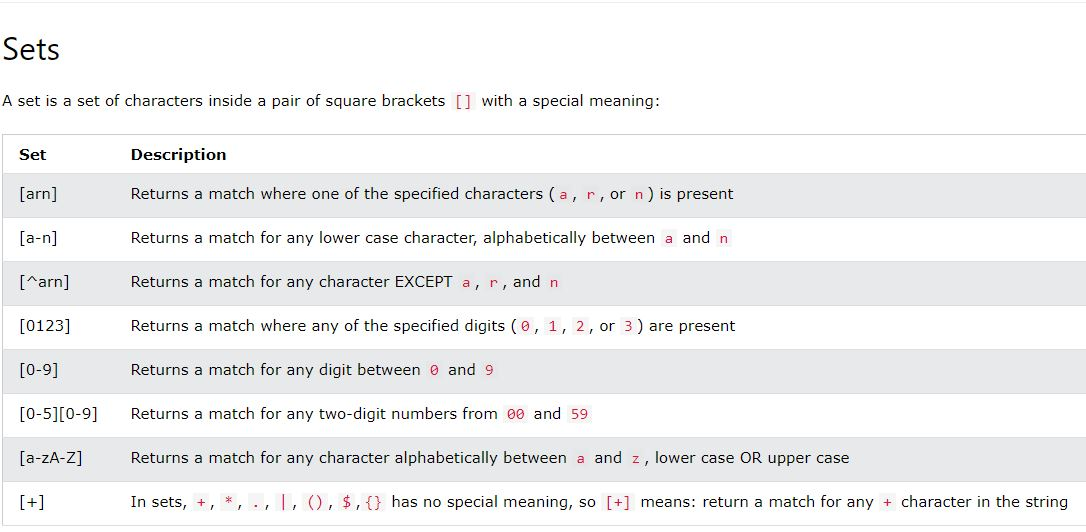

If we inspect the current dataframe. We find that it is structured in a better way than before. 

However, the ***Week*** column looks a bit ugly!

4. Let's try to place only the week number in that column without the extras surronding it.

In [ ]:
df_billboard['Week'] = df_billboard['Week'].str.extract('(\d+)', expand=False) #this regular expression extracts the digits from the string

5. Now let's inspect the ***Week*** column in the dataframe.

In [ ]:
df_billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,Rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0


Next, let's try to find the date at which the song ranked the number that is shown per row.

6. To do that let's first think of the equation that is going to get us the relevant date at which the song ranked the *rth*.



In [ ]:
#date_at_current_peak = date.entered + week 

# Let's make sure that the Week column is numeric.
df_billboard['Week'] = df_billboard['Week'].astype(int)

df_billboard['Rank Date'] = pd.to_datetime(df_billboard['date.entered'] )+ pd.to_timedelta(df_billboard['Week'], unit='W') - pd.DateOffset(weeks=1)
df_billboard.head()

,year,artist.inverted,track,time,genre,date.entered,date.peaked,Week,Rank,Rank Date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,1,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,1,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,1,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,1,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,1,57.0,2000-08-05


*Timedeltas are absolute differences in times, expressed in difference units (e.g. days, hours, minutes, seconds). This method converts an argument from a recognized timedelta format / value into a Timedelta type.*


7. Let's only keep necessary columns

In [ ]:
df_billboard = df_billboard[['year','artist.inverted','track','time','genre','date.peaked','Rank','Rank Date']]

In [ ]:
df_billboard.head()

,year,artist.inverted,track,time,genre,date.peaked,Rank,Rank Date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-11-18,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-04-08,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,2000-01-29,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,2000-09-16,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-10-14,57.0,2000-08-05


8. How to rename your columns?

In [ ]:
df_billboard = df_billboard.rename(columns={'year':'Year','artist.inverted':'Artist LN-FN','track':'Track','time':'Time','genre':'Genre', 'date.peaked': 'Date Peaked'})

Display the dataframe

In [ ]:
df_billboard

,Year,Artist LN-FN,Track,Time,Genre,Date Peaked,Rank,Rank Date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-11-18,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-04-08,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,2000-01-29,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,2000-09-16,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-10-14,57.0,2000-08-05
...,...,...,...,...,...,...,...,...
24087,2000,Ghostface Killah,Cherchez LaGhost,3:04,R&B,2000-08-05,NaN,2002-01-12
24088,2000,"Smith, Will",Freakin' It,3:58,Rap,2000-02-12,NaN,2001-07-21
24089,2000,Zombie Nation,Kernkraft 400,3:30,Rock,2000-09-02,NaN,2002-02-09
24090,2000,"Eastsidaz, The",Got Beef,3:58,Rap,2000-07-01,NaN,2001-12-08


In the above dataframe, there are some *NaN* values. What are we going to do?
9. Apply quick data cleaning and then observe the dataset

In [ ]:
df_billboard = df_billboard.dropna()

In [ ]:
df_billboard

,Year,Artist LN-FN,Track,Time,Genre,Date Peaked,Rank,Rank Date
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-11-18,78.0,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-04-08,15.0,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,2000-01-29,71.0,1999-10-23
3,2000,Madonna,Music,3:45,Rock,2000-09-16,41.0,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-10-14,57.0,2000-08-05
...,...,...,...,...,...,...,...,...
19663,2000,Lonestar,Amazed,4:25,Country,2000-03-04,45.0,2000-08-12
19700,2000,Creed,Higher,5:16,Rock,2000-07-22,50.0,2000-11-18
19980,2000,Lonestar,Amazed,4:25,Country,2000-03-04,50.0,2000-08-19
20017,2000,Creed,Higher,5:16,Rock,2000-07-22,50.0,2000-11-25


The below images shows the difference between the dataset post-tidying and pre-tidying:

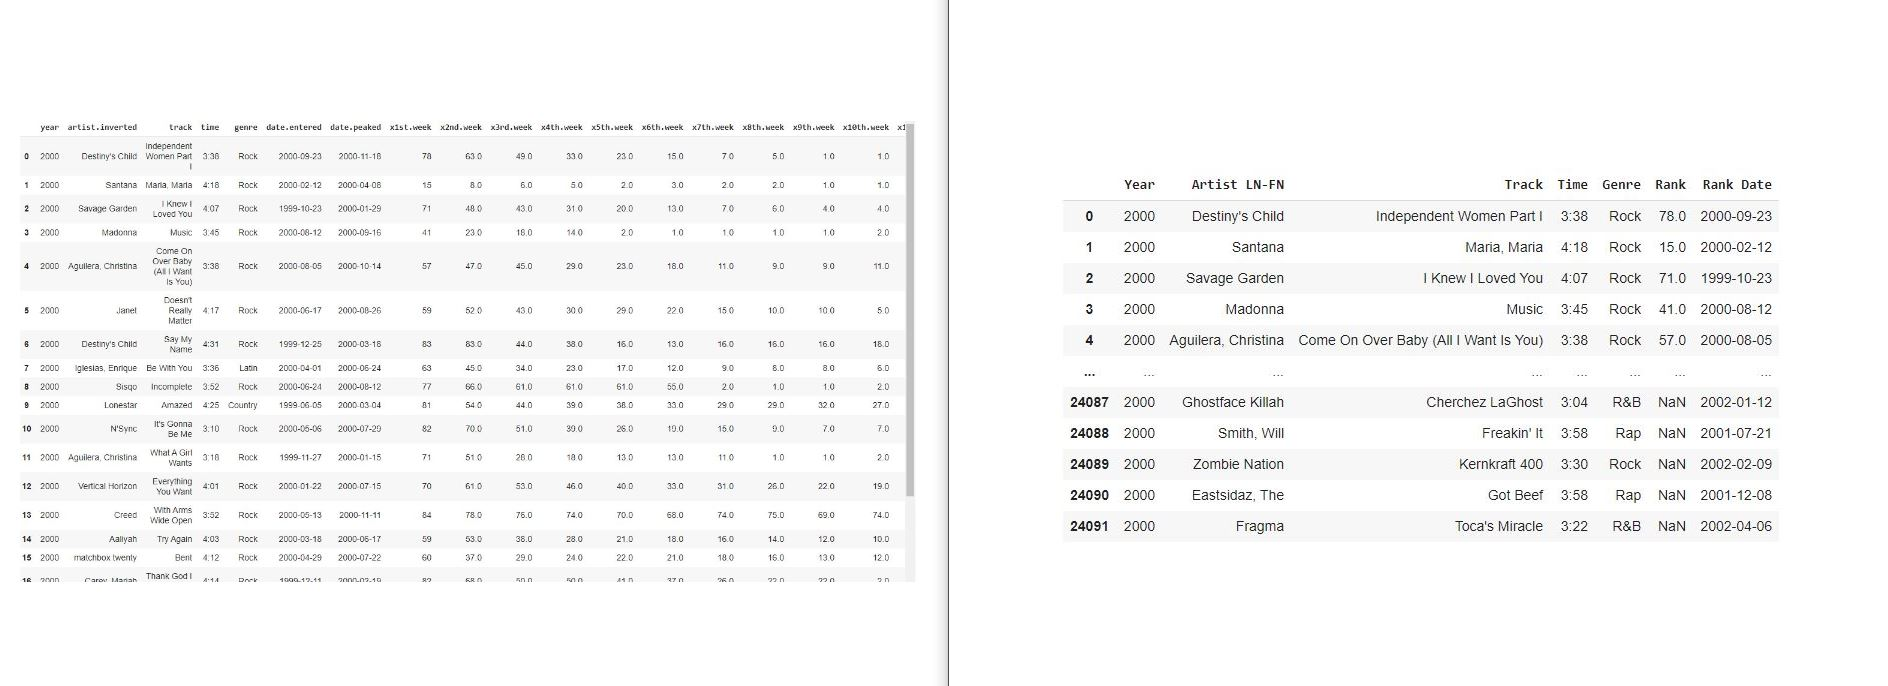


### **Tuberculosis Dataset**

***Important Note: *** The Tuberculosis dataset exercise is similar to what we have done in the billboard dataset. The only difference is in the process of using the `extract` function, which in Tuberculosis dataset will return a dataframe not a series regardless of the `expand` argument. That is because, we are extracting 3 different groups using regex expression, each will be returned in a series within a dataframe.

This dataset outlines the number of tuberculosis patients in different countries in the year 2000.

A few notes on the raw data set:

- The columns starting with "m" or "f" contain multiple variables: 
    - Sex ("m" or "f")
    - Age Group ("0-14","15-24", "25-34", "45-54", "55-64", "65", "unknown")
- Mixture of 0s and missing values("NaN"). This is due to the data collection process and the distinction is important for this dataset.


1. Read the CSV

In [ ]:
df_tuberculosis = pd.read_csv("tb.csv")

Observe the rows of the dataset

In [ ]:
df_tuberculosis

,country,year,m014,m1524,m2534,m3544,m4554,m5564,m65,mu,f014
0,AD,2000,0.0,0.0,1.0,0.0,0,0,0.0,NaN,NaN
1,AE,2000,2.0,4.0,4.0,6.0,5,12,10.0,NaN,3.0
2,AF,2000,52.0,228.0,183.0,149.0,129,94,80.0,NaN,93.0
3,AG,2000,0.0,0.0,0.0,0.0,0,0,1.0,NaN,1.0
4,AL,2000,2.0,19.0,21.0,14.0,24,19,16.0,NaN,3.0
5,AM,2000,2.0,152.0,130.0,131.0,63,26,21.0,NaN,1.0
6,AN,2000,0.0,0.0,1.0,2.0,0,0,0.0,NaN,0.0
7,AO,2000,186.0,999.0,1003.0,912.0,482,312,194.0,NaN,247.0
8,AR,2000,97.0,278.0,594.0,402.0,419,368,330.0,NaN,121.0
9,AS,2000,NaN,NaN,NaN,NaN,1,1,NaN,NaN,NaN


3. Use the `melt` function to fix the structure of the dataset

In [ ]:
id_vars = ["country","year"]
df_tuberculosis =pd.melt(df_tuberculosis,id_vars=id_vars, var_name='Gender/Age',value_name='Count')

In [ ]:
df_tuberculosis.head()

,country,year,Gender/Age,Count
0,AD,2000,m014,0.0
1,AE,2000,m014,2.0
2,AF,2000,m014,52.0
3,AG,2000,m014,0.0
4,AL,2000,m014,2.0


4. Extract the gender - lower age bound - upper age bound using regex

In [ ]:
df_tuberculosis_temp = df_tuberculosis['Gender/Age'].str.extract('(\D)(\d+)(\d{2})')
# non digit - one or more digits(0-9) / exactly 2 digits

In [ ]:
df_tuberculosis_temp

,0,1,2
0,m,0,14
1,m,0,14
2,m,0,14
3,m,0,14
4,m,0,14
...,...,...,...
85,f,0,14
86,f,0,14
87,f,0,14
88,f,0,14


5. Change the column names

In [ ]:
df_tuberculosis_temp.columns=["gender","lower_age","upper_age"]

In [ ]:
df_tuberculosis_temp

,gender,lower_age,upper_age,Age Range
0,m,0,14,0-14
1,m,0,14,0-14
2,m,0,14,0-14
3,m,0,14,0-14
4,m,0,14,0-14
...,...,...,...,...
85,f,0,14,0-14
86,f,0,14,0-14
87,f,0,14,0-14
88,f,0,14,0-14


6. Merge the lower and upper age columns together and separate them by a dash `-` .

In [ ]:
df_tuberculosis_temp["Age Range"] = df_tuberculosis_temp['lower_age'].astype(str) +"-"+ df_tuberculosis_temp['upper_age'].astype(str)

7. Now, use a function to merge both datasets together: `df_tuberculosis_temp` and `df_tuberculosis`


In [ ]:
result = pd.concat([df_tuberculosis, df_tuberculosis_temp],axis=1) #axis =1 means merge the columns together
final_tuberculosis = result[["country","year","gender","Age Range","Count"]]
final_tuberculosis.head(20)

,country,year,gender,Age Range,Count
0,AD,2000,m,0-14,0.0
1,AE,2000,m,0-14,2.0
2,AF,2000,m,0-14,52.0
3,AG,2000,m,0-14,0.0
4,AL,2000,m,0-14,2.0
5,AM,2000,m,0-14,2.0
6,AN,2000,m,0-14,0.0
7,AO,2000,m,0-14,186.0
8,AR,2000,m,0-14,97.0
9,AS,2000,m,0-14,NaN


### **Weather Dataset**

In this dataset, variables are stored in both rows and columns. `tmax` and `tmin` stand for max and min temperatures for each day. The day is being spread across multiple columns. We need the data to represent min and max temperatures per date.


1. Read dataset into panadas dataframe

In [ ]:
weather_df = pd.read_csv('weather.csv')

2. Observe the rows

In [ ]:
weather_df

,id,year,month,element,d1,d2,d3,d4,d5,d6,d7,d8
0,MX17004,2010,1,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MX17004,2010,1,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,MX17004,2010,2,tmax,NaN,27.3,24.1,NaN,NaN,NaN,NaN,NaN
3,MX17004,2010,2,tmin,NaN,14.4,14.4,NaN,NaN,NaN,NaN,NaN
4,MX17004,2010,3,tmax,NaN,NaN,NaN,NaN,32.1,NaN,NaN,NaN
5,MX17004,2010,3,tmin,NaN,NaN,NaN,NaN,14.2,NaN,NaN,NaN
6,MX17004,2010,4,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,MX17004,2010,4,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,MX17004,2010,5,tmax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,MX17004,2010,5,tmin,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Notice that the dataset is full of `NaN` values. In addition its structure is messed up! Let's fix the structure first.

3. Use the `melt` function.

In [ ]:
id_vars = ['id','year','month','element']
weather_df= pd.melt(weather_df, id_vars=id_vars,value_name="degree",var_name='day_raw')

4. Observe the melted dataframe.

In [ ]:
weather_df

,id,year,month,element,day_raw,degree
0,MX17004,2010,1,tmax,d1,NaN
1,MX17004,2010,1,tmin,d1,NaN
2,MX17004,2010,2,tmax,d1,NaN
3,MX17004,2010,2,tmin,d1,NaN
4,MX17004,2010,3,tmax,d1,NaN
...,...,...,...,...,...,...
75,MX17004,2010,3,tmin,d8,NaN
76,MX17004,2010,4,tmax,d8,NaN
77,MX17004,2010,4,tmin,d8,NaN
78,MX17004,2010,5,tmax,d8,NaN


5. The issue of the `NaN` values still stands. How can we fix it?

In [ ]:
weather_df = weather_df.copy().dropna() 

In [ ]:
weather_df

,id,year,month,element,day_raw,degree
12,MX17004,2010,2,tmax,d2,27.3
13,MX17004,2010,2,tmin,d2,14.4
22,MX17004,2010,2,tmax,d3,24.1
23,MX17004,2010,2,tmin,d3,14.4
44,MX17004,2010,3,tmax,d5,32.1
45,MX17004,2010,3,tmin,d5,14.2


6. Next, let's extract the day digit from the `day_raw` column. Make sure to change the column to be numeric, as we are going to use it to calculate the date.

In [ ]:
weather_df['day_numeric'] = weather_df['day_raw'].str.extract('(\d+)',expand=False).astype(int)

7. Observe the dataframe 

In [ ]:
weather_df

,id,year,month,element,day_raw,degree,day_numeric
12,MX17004,2010,2,tmax,d2,27.3,2
13,MX17004,2010,2,tmin,d2,14.4,2
22,MX17004,2010,2,tmax,d3,24.1,3
23,MX17004,2010,2,tmin,d3,14.4,3
44,MX17004,2010,3,tmax,d5,32.1,5
45,MX17004,2010,3,tmin,d5,14.2,5


8. Check that the year and month columns are numeric

In [ ]:
weather_df.dtypes

id              object
year             int64
month            int64
element         object
day_raw         object
degree         float64
day_numeric      int64
dtype: object

9. Import the `datetime` library
10. Use the `day_numeric`, `month`, and `year` columns to create the date column using the `apply` function along with `lambda`.



In [ ]:
import datetime 

In [ ]:
weather_df['date'] =weather_df.apply(lambda row: datetime.date(year = row['year'],month = row['month'],day=row['day_numeric']),axis=1)

11. Observe the dataset

In [ ]:
weather_df

,id,year,month,element,day_raw,degree,day_numeric,date
12,MX17004,2010,2,tmax,d2,27.3,2,2010-02-02
13,MX17004,2010,2,tmin,d2,14.4,2,2010-02-02
22,MX17004,2010,2,tmax,d3,24.1,3,2010-02-03
23,MX17004,2010,2,tmin,d3,14.4,3,2010-02-03
44,MX17004,2010,3,tmax,d5,32.1,5,2010-03-05
45,MX17004,2010,3,tmin,d5,14.2,5,2010-03-05


12. Drop unnecessary columns and observe the dataframe

In [ ]:
weather_df = weather_df.copy().drop(['day_raw','day_numeric','year','month'],axis=1)

In [ ]:
weather_df

,id,element,degree,date
12,MX17004,tmax,27.3,2010-02-02
13,MX17004,tmin,14.4,2010-02-02
22,MX17004,tmax,24.1,2010-02-03
23,MX17004,tmin,14.4,2010-02-03
44,MX17004,tmax,32.1,2010-03-05
45,MX17004,tmin,14.2,2010-03-05


Alright, this seems like a much cleaner and tider dataset. Nevertheless, the `element` column contains only 2 values, `tmax` and `tmin`, and they aren't really "values". They are more of variables for each day. So why not create a column for each of them?  

Previously, we wanted to melt the columns to make them values within the dataset. What we want to do now, is change the values within the column to column heading. For that use the `pivot_table` function.

The `pivot_table` takes 3 main arguments: `index`, `columns`, `values`.

In [ ]:
weather_df['id']="MX17004"# I have one id 
pd.pivot_table(weather_df,index=["id","date"], columns="element",values="degree") #Populate the new tmin and tmax with value = degree

element             tmax  tmin
id      date                  
MX17004 2010-02-02  27.3  14.4
        2010-02-03  24.1  14.4
        2010-03-05  32.1  14.2

In [ ]:
#to reset the index
weather_df2 = pd.pivot_table(weather_df,index=["id","date"], columns="element",values="degree") #Populate the new tmin and tmax with value = degree
weather_df2.reset_index(inplace=True)

In [ ]:
weather_df2

element,id,date,tmax,tmin
0,MX17004,2010-02-02,27.3,14.4
1,MX17004,2010-02-03,24.1,14.4
2,MX17004,2010-03-05,32.1,14.2


In order to remove the title of the index we can use the `rename_axis` method.It set the name of the axis for the index or columns.



In [ ]:
weather_df2.rename_axis(None, axis=1, inplace=True)

In [ ]:
weather_df2

,id,date,tmax,tmin
0,MX17004,2010-02-02,27.3,14.4
1,MX17004,2010-02-03,24.1,14.4
2,MX17004,2010-03-05,32.1,14.2


### **Tidying DataFrame Exercise**

The [GapMinder dataset](https://raw.githubusercontent.com/raneemsultan/Data-Engineering-W21/main/Lab7/gapminder.csv) includes information about the life expectancy, the GDP per capita, and the population of various countries between the years 1952 and 2007.

Import the dataset, investigate it to identify what the potential attributes should be, the problems with the current structure, and think of how to tidy the dataset, and then proceed to tidy the dataset.

In [ ]:
#You solution here